<a href="https://colab.research.google.com/github/Anushka118/MTech/blob/main/Software_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries/Dataset

In [ ]:
#1b. import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter  # To check class distribution

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve, auc

In [ ]:
#1a. import the given dataset
df = pd.read_excel('/content/drive/MyDrive/ML_Assignment/defect_dataset-ant-1.3.xlsx')

In [ ]:
df.shape

(116, 24)

In [ ]:
# printing Attribute details
with open('/content/drive/MyDrive/ML_Assignment/metadata_defectdataset.txt', 'r') as f:
  content = f.read()
  print(content)

Dataset

The dataset 'Defect Datasets' containing defect datasets gathered from real-world open source projects and has been widely used in previous studies for software defect prediction. Additionally, a target attribute labelled "bug" indicates whether the it is having defect or not.

Attribute Details

wmc 		: Weighted methods of class
dit 		: Depth of inheritance tree
noc 		: Number of children.
cbo 	        : Coupling between objects
rfc 		: Response for class.
lcom 		: Lack of cohesion in methods.
ca 		: Couplings of afference
ce 	        : Couplings of efferent.
npm 		: Number of public methods.
lcom3 		: Lack of cohesion in methods
loc 		: Lines of code.
dam 	        : Data of access metric.
moa 		: Measure of aggregation.
mfa 		: Measure of functional abstraction.
cam 	        : Cohesion among methods
ic 	        : Inheritance coupling
cbm 		: Coupling between methods
amc             : Average method complexity.
max_cc 		: Max value of CC (cyclomatic complexity)
avg_cc        

#2. Data visualization and exploration

---



##2a. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [ ]:
pd.set_option('display.max_columns', None)
print(df.head(2))

  name  version                                          name.1  wmc  dit  \
0  ant      1.3         org.apache.tools.ant.taskdefs.ExecuteOn   11    4   
1  ant      1.3  org.apache.tools.ant.taskdefs.TaskOutputStream    3    2   

   noc  cbo  rfc  lcom  ca  ce  npm  lcom3  loc  dam  moa       mfa       cam  \
0    2   14   42    29   2  12    5  0.725  395  1.0    1  0.885057  0.232323   
1    0    1    9     0   0   1    1  0.000   58  1.0    1  0.714286  0.666667   

   ic  cbm        amc  max_cc  avg_cc  bug  
0   3    4  34.545455       3  1.2727    0  
1   1    1  17.333333       1  0.6667    0  


-- the target variable is 'bug'.

-- name, version, name.1 can be dropped

'name', 'version', 'name.1' -- are irrelevant while predicting the bug. Therefore, these can be dropped

In [ ]:
df2 = df



---



##2b. Provide appropriate data visualizations to get an insight about the dataset.

### Visualising each attribute using histogram to understand their distribution.

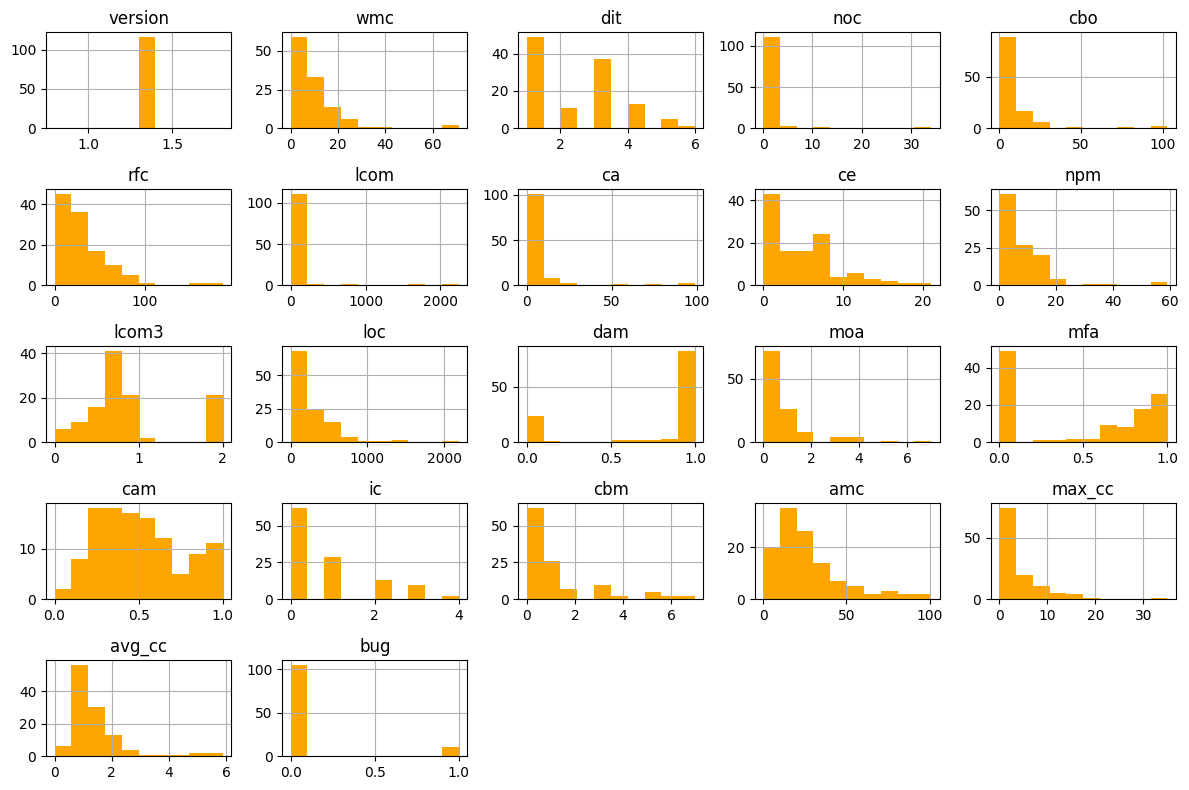

In [ ]:
df2.hist(bins=10, figsize=(12,8), color='orange')
plt.tight_layout()
plt.show()

### Create box plots for each variable to detect outliers

Index(['version', 'wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm',
       'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc',
       'max_cc', 'avg_cc', 'bug'],
      dtype='object')
11x2


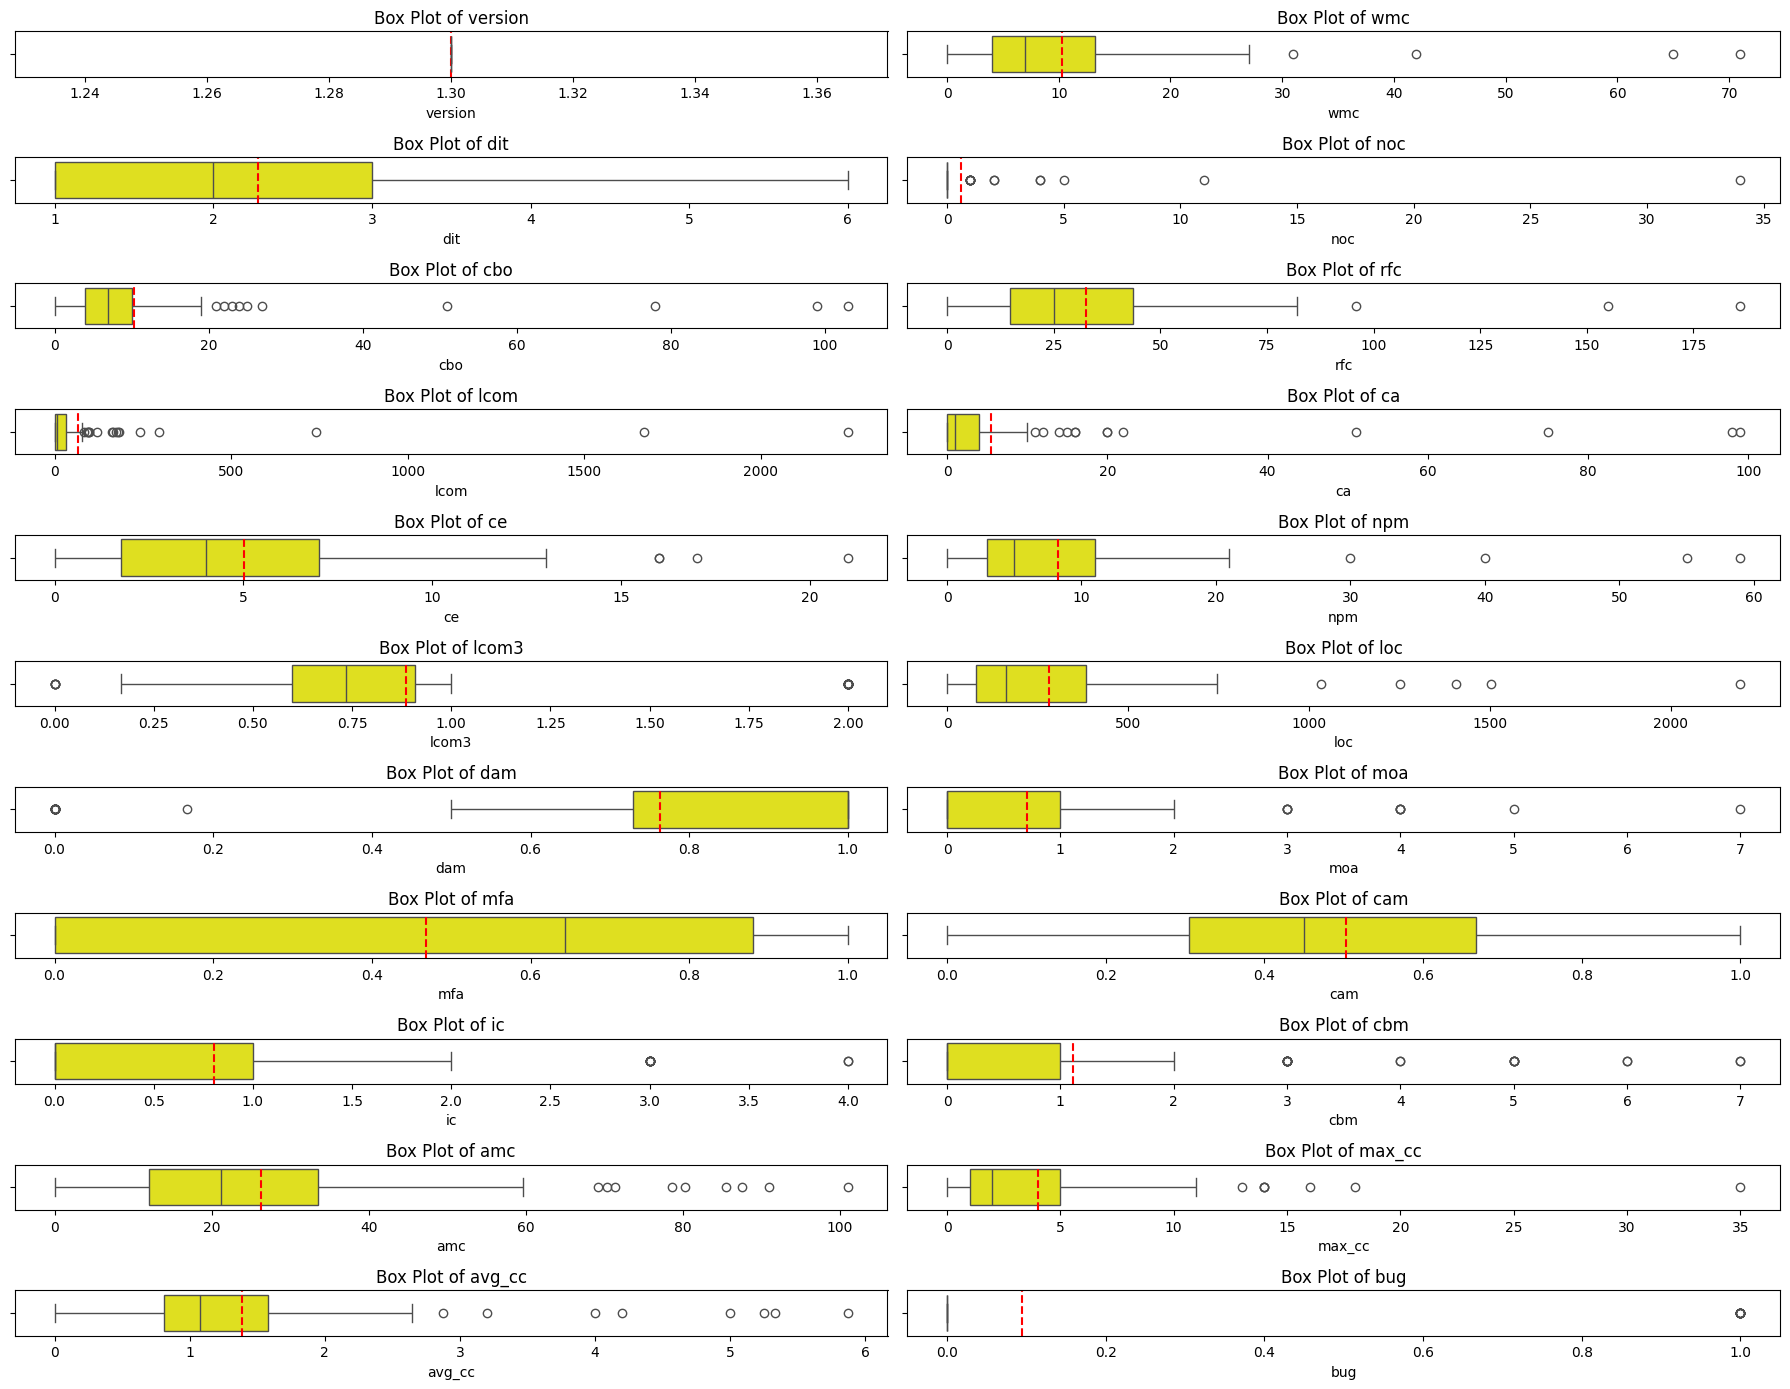

In [ ]:
# Select numerical features for box plots
numerical_features = df2.select_dtypes(include=np.number).columns
print(numerical_features)

# Calculate number of rows and columns for subplots
num_rows = ((len(numerical_features)+1)//2)
num_cols = 2
print(f"{num_rows}x{num_cols}")

means = df2[numerical_features].mean()
medians = df2[numerical_features].median()

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 14))

# Iterate through features and create box plots in subplots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]  # Get the current subplot axes

    sns.boxplot(x=df2[feature], ax=ax, color='yellow')
    ax.set_title(f'Box Plot of {feature}')

    ax.axvline(means[feature], color='red', linestyle='--', label='Mean')



plt.tight_layout()
plt.show()

##2c.	Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.

### Correlation matrix

In [ ]:
numeric_data = df2.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
corr_df = pd.DataFrame(correlation_matrix)
corr_df

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wmc,NaN,1.000000,0.087049,0.083901,0.522369,0.866605,0.862696,0.424892,0.472844,0.964857,-0.124795,0.825043,0.208406,0.436508,-0.084860,-0.533118,0.212326,0.150897,-0.018509,0.447834,0.115243,0.336936
dit,NaN,0.087049,1.000000,-0.092203,0.009518,0.231511,-0.022812,-0.123798,0.481531,0.102552,-0.251154,0.097948,0.294160,0.042236,0.865155,-0.171163,0.785247,0.723490,0.145528,-0.045801,-0.065128,-0.049005
noc,NaN,0.083901,-0.092203,1.000000,0.413229,-0.012750,0.005822,0.413252,0.025774,0.080942,-0.044278,-0.039450,0.105219,0.296639,-0.108796,-0.136766,-0.097894,-0.086855,-0.103729,0.006126,0.006224,-0.005590
cbo,NaN,0.522369,0.009518,0.413229,1.000000,0.441747,0.515713,0.965211,0.184717,0.497396,-0.113569,0.409422,0.110680,0.258664,-0.087793,-0.286173,-0.017903,-0.002245,-0.048568,0.267783,0.026839,0.243836
rfc,NaN,0.866605,0.231511,-0.012750,0.441747,1.000000,0.737635,0.284800,0.669950,0.787226,-0.205894,0.915658,0.272616,0.435708,0.097386,-0.529833,0.327221,0.224296,0.341256,0.494479,0.241684,0.442427
lcom,NaN,0.862696,-0.022812,0.005822,0.515713,0.737635,1.000000,0.462432,0.315940,0.838795,0.006037,0.723024,0.023345,0.259487,-0.112111,-0.274241,0.120514,0.055060,-0.013642,0.345117,0.045771,0.243757
ca,NaN,0.424892,-0.123798,0.413252,0.965211,0.284800,0.462432,1.000000,-0.075034,0.407285,-0.076859,0.303467,0.031408,0.130831,-0.202323,-0.202246,-0.137637,-0.088400,-0.135936,0.227285,0.000472,0.178714
ce,NaN,0.472844,0.481531,0.025774,0.184717,0.669950,0.315940,-0.075034,1.000000,0.447549,-0.136871,0.473348,0.305154,0.525990,0.396456,-0.346794,0.452396,0.316242,0.305069,0.184549,0.098989,0.288596
npm,NaN,0.964857,0.102552,0.080942,0.497396,0.787226,0.838795,0.407285,0.447549,1.000000,-0.102577,0.723570,0.220208,0.416981,-0.060698,-0.468508,0.229539,0.169041,-0.100261,0.354319,0.047022,0.253455


### Heatmap to visualize Correlation Matrix

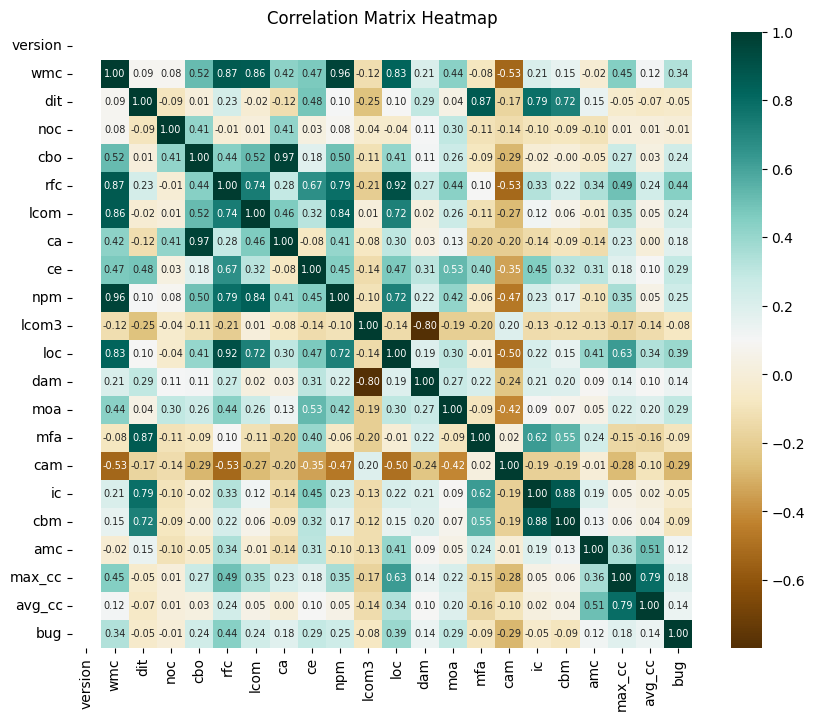

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt=".2f", annot_kws={"size":7})
plt.title('Correlation Matrix Heatmap')
plt.show()

* dam,lcom3 are negatively correlated.
* wmc, rfc, lcom are +vely correlated.
* wmc & npm +ve
* wmc & loc +ve


**Will this correlational analysis have effect on feature selection that you will perform in the next step?** <br>
Correlation analysis will have an effect on feature selection.<br>


1.   **Redundancy:** Correlated features often provide similar information. Including both might not add significant value to the model and can lead to the "curse of dimensionality", where having too many features can sometimes degrade model performance. Correlation analysis helps identify redundant features.
2.   **Multicollinearity:** High correlation between independent features (multicollinearity) can destabilize machine learning models and make it difficult to intepret feature importance. If 2 features are highly correlated, it means they contain contain very similar information. In feature selection, we might choose to keep only one of them to avoud redundancy and simplify the model.
3. **Relationship with the Target Variable:** Correlation coefficients between the independent features and the target variable indicate the strength and direction (positive or negative) of the linear relation. While correlation doesn't imply causation, it can help prioritize features that show a stronger linear relation with the target variable, making them potentially more useful for prediction.

The dimension of the given dataset is (116,24). Since the no. of features is quite high and the no. of observations are quite low, it is better to perform dimensionality reduction on the dataset to have lesser features. This can be done only after observing the correlation between different attributes and finding potential attributes to remove/transform.


Mentioning all the pairs of highly correlated features with threshold value for coefficient of correlation = 0.7

In [ ]:
#find highly correlated pairs |val|>0.7
pairs = []
for i in range(len(corr_df.columns)):
    for j in range(i+1,len(corr_df.columns)):
        if abs(corr_df.iloc[i,j])>0.70:
          pairs.append((corr_df.columns[i], corr_df.columns[j], corr_df.iloc[i,j]))


In [ ]:
for pair_val in pairs:
  print(f"({pair_val[0]},{pair_val[1]}) -> {round(pair_val[2],2)}")


(wmc,rfc) -> 0.87
(wmc,lcom) -> 0.86
(wmc,npm) -> 0.96
(wmc,loc) -> 0.83
(dit,mfa) -> 0.87
(dit,ic) -> 0.79
(dit,cbm) -> 0.72
(cbo,ca) -> 0.97
(rfc,lcom) -> 0.74
(rfc,npm) -> 0.79
(rfc,loc) -> 0.92
(lcom,npm) -> 0.84
(lcom,loc) -> 0.72
(npm,loc) -> 0.72
(lcom3,dam) -> -0.8
(ic,cbm) -> 0.88
(max_cc,avg_cc) -> 0.79


#3. Pre-processing and Cleaning

#### Basic Information

In [ ]:
#shape of the dataset
print("Dataset Shape:",df2.shape)

Dataset Shape: (116, 24)


=> 24 attributes and 116 records

In [ ]:
#basic info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     116 non-null    object 
 1   version  116 non-null    float64
 2   name.1   116 non-null    object 
 3   wmc      116 non-null    int64  
 4   dit      116 non-null    int64  
 5   noc      116 non-null    int64  
 6   cbo      116 non-null    int64  
 7   rfc      116 non-null    int64  
 8   lcom     116 non-null    int64  
 9   ca       116 non-null    int64  
 10  ce       116 non-null    int64  
 11  npm      116 non-null    int64  
 12  lcom3    116 non-null    float64
 13  loc      116 non-null    int64  
 14  dam      116 non-null    float64
 15  moa      116 non-null    int64  
 16  mfa      116 non-null    float64
 17  cam      116 non-null    float64
 18  ic       116 non-null    int64  
 19  cbm      116 non-null    int64  
 20  amc      116 non-null    float64
 21  max_cc   116 non

In [ ]:
#descriptive statistics
pd.set_option('display.max_columns', None)
df2.describe()

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,116.0,116.000000,116.000000,116.000000,116.000000,116.000000,116.00000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.3,10.258621,2.284483,0.603448,10.284483,32.629310,67.87069,5.517241,5.017241,8.275862,0.886516,281.284483,0.762808,0.706897,0.467854,0.503526,0.801724,1.112069,26.334244,4.025862,1.388611,0.094828
std,0.0,10.538642,1.284056,3.372212,15.376326,28.526884,267.98308,15.429775,4.281371,8.973959,0.566917,332.045696,0.406904,1.230180,0.419383,0.252774,1.056819,1.687661,21.252732,4.709770,1.013539,0.294248
min,1.3,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.3,4.000000,1.000000,0.000000,4.000000,14.750000,0.75000,0.000000,1.750000,3.000000,0.598437,79.750000,0.729167,0.000000,0.000000,0.304840,0.000000,0.000000,11.988095,1.000000,0.809375,0.000000
50%,1.3,7.000000,2.000000,0.000000,7.000000,25.000000,6.00000,1.000000,4.000000,5.000000,0.735417,163.500000,1.000000,0.000000,0.643966,0.450000,0.000000,0.000000,21.250000,2.000000,1.076300,0.000000
75%,1.3,13.250000,3.000000,0.000000,10.000000,43.500000,33.50000,4.000000,7.000000,11.000000,0.909382,385.000000,1.000000,1.000000,0.880952,0.666667,1.000000,1.000000,33.512500,5.000000,1.578950,0.000000
max,1.3,71.000000,6.000000,34.000000,103.000000,186.000000,2247.00000,99.000000,21.000000,59.000000,2.000000,2193.000000,1.000000,7.000000,1.000000,1.000000,4.000000,7.000000,101.000000,35.000000,5.869600,1.000000


In [ ]:
#check for missing values
df2.isnull().sum()

,0
name,0
version,0
name.1,0
wmc,0
dit,0
noc,0
cbo,0
rfc,0
lcom,0
ca,0


=> no missing/null values

In [ ]:
df2.columns

Index(['name', 'version', 'name.1', 'wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom',
       'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic',
       'cbm', 'amc', 'max_cc', 'avg_cc', 'bug'],
      dtype='object')

In [ ]:
# distribution of the TARGET VARIABLE: 'bug'
df['bug'].value_counts()

,count
bug,
0,105
1,11


'name', 'version', 'name.1' -- are irrelevant while predicting the bug. Therefore, these can be dropped

In [ ]:
df2 = df.drop(columns=['name', 'version','name.1'])

#### Preprocessing:
-- initial  bug:non-bug population-> 11:105

1. Split dataset into X and y datasets for model training.
2. SMOTE is performed to increase the number of samples as the values are skewed for bug and non-bug.
3. Split dataset into train and test.
4. Perform Standardization on the train dataset and then transform the test dataset
5. Performing PCA for dimensionality reduction

JUSTIFICATION FOR EACH PROPROCESSING TECHNIQUE <BR>


1.   **SMOTE TECHNIQUE:** The dataset given to us is imbalanced dataset, because the class 'non-bug' has signnificantly more observations than the 'bug' class (11:105). This imbalance can cause ML models to be biased towards the majority class and perform poorly on the minority class. Therefore, it is necessary to apply SMOTE  as it adds new synthetic observations.  

2.   **STANDARDIZATION:** The dataset includes a variety of software metrics, such as complexity metrics (wmc, rfc), coupling metrics (cbo, ca), and size metrics (loc). These metrics naturally exist on different scales Standardization is essential to bring these diverse metrics to a common scale, allowing for fair comparison and preventing certain metrics from overshadowing others in the analysis or modeling process. It is more robust to outliers.

3. **TEST TRAIN SPLIT:** Splitting the entire dataset is to accurataely evaluate how well a ML model is likely to perform on unseen data. By splitting the data, you use the training set to build the model and the testing set to simulate how the model would perform in a real-world scenario with new data. This also prevents overfitting, which means if a model performs significantly better on the training set than on the testing set, it's implies that the model might be overfitting.

4. **PRINCIPAL COMPONENT ANALYSIS (PCA):** There are many software metrics, capturing various aspects of sodtware characteristics. PCA can help reduce the number of metrics while retaining the most important information for defect prediction. Also, as it can be observed from correlation matrix that several of these metrics are correlated. So we can perform PCA on this dataset which can simplify the modeling process and potentially improve model performance.




In [ ]:
X = df2.drop(columns=['bug'])
y = df2['bug']

In [ ]:
print(X.shape)
print(y.shape)

(116, 20)
(116,)


In [ ]:
def split_data(X,y, test_size):
  # print(f"Train and Test size for split: {1-test_size} : {test_size}")
  # print(f"Dimension before SMOTE for X: {X.shape}")
  # print(f"Dimension before SMOTE for y: {y.shape}")
  # print(f"Dimension before SMOTE for y: {y.value_counts()}")

  # smote = SMOTE(random_state=42)  # You can set a random_state for reproducibility
  # X_sampled, y_sampled = smote.fit_resample(X, y)

  # print(f"Dimension after SMOTE for X: {X_sampled.shape}")
  # print(f"Dimension after SMOTE for y: {y_sampled.shape}")
  # print(f"Dimension before SMOTE for y: {y_sampled.value_counts()}")


  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = test_size, random_state = 42, stratify=y)

  print(f"Dimension before SMOTE for X: {X_train.shape}")
  print(f"Dimension before SMOTE for y: {y_train.shape}")
  print(f"y distribution before SMOTE: {y_train.value_counts()}")

  smote = SMOTE(random_state=42)
  X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
  X_train_sampled, y_train_sampled = smote.fit_resample(X_train_sampled, y_train_sampled)
  print(f"Dimension after SMOTE for X: {X_train_sampled.shape}")
  print(f"Dimension after SMOTE for y: {y_train_sampled.shape}")
  print(f"y distribution after SMOTE: {y_train_sampled.value_counts()}")

  # scaler = StandardScaler()
  # X_train_scaled = scaler.fit_transform(X_train_sampled)
  # X_val_scaled = scaler.fit_transform(X_val)
  # # X_test_scaled = scaler.transform(X_test)

  X_train_scaled = X_train_sampled
  X_val_scaled = X_val
  print(f"Shape of X_train after Standard Scaling: {X_train_scaled.shape}")
  print(f"Shape of X_val after Standard Scaling: {X_val_scaled.shape}")
  # print(f"Shape of X_test after Standard Scaling: {X_test_scaled.shape}")


  pca = PCA(n_components=0.95)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_val_pca = pca.transform(X_val_scaled)
  # X_test_pca = pca.transform(X_test_scaled)

  print(f"Shape of X_train after PCA: {X_train_pca.shape}")
  print(f"Shape of X_val after PCA: {X_val_pca.shape}")
  # print(f"Shape of X_test after PCA: {X_test_pca.shape}")

  # return X_train_pca, X_val_pca, X_test_pca, y_train, y_val, y_test
  return X_train_pca, X_val_pca, y_train_sampled, y_val


#### Train test split= 0.8:0.2

In [ ]:
X_train_pca_80, X_val_pca_20, y_train_80, y_val_20 = split_data(X,y,0.2)
print(y_train_80.value_counts())
print(y_val_20.value_counts())

Dimension before SMOTE for X: (92, 20)
Dimension before SMOTE for y: (92,)
y distribution before SMOTE: bug
0    83
1     9
Name: count, dtype: int64
Dimension after SMOTE for X: (166, 20)
Dimension after SMOTE for y: (166,)
y distribution after SMOTE: bug
0    83
1    83
Name: count, dtype: int64
Shape of X_train after Standard Scaling: (166, 20)
Shape of X_val after Standard Scaling: (24, 20)
Shape of X_train after PCA: (166, 2)
Shape of X_val after PCA: (24, 2)
bug
0    83
1    83
Name: count, dtype: int64
bug
0    22
1     2
Name: count, dtype: int64


In [ ]:
X_train_pca_70, X_val_pca_30, y_train_70, y_val_30 = split_data(X,y,0.3)
print(y_train_70.value_counts())
print(y_val_30.value_counts())

Dimension before SMOTE for X: (81, 20)
Dimension before SMOTE for y: (81,)
y distribution before SMOTE: bug
0    73
1     8
Name: count, dtype: int64
Dimension after SMOTE for X: (146, 20)
Dimension after SMOTE for y: (146,)
y distribution after SMOTE: bug
0    73
1    73
Name: count, dtype: int64
Shape of X_train after Standard Scaling: (146, 20)
Shape of X_val after Standard Scaling: (35, 20)
Shape of X_train after PCA: (146, 2)
Shape of X_val after PCA: (35, 2)
bug
0    73
1    73
Name: count, dtype: int64
bug
0    32
1     3
Name: count, dtype: int64


In [ ]:
X_train_pca_60, X_val_pca_40, y_train_60, y_val_40 = split_data(X,y,0.4)
print(y_train_60.value_counts())
print(y_val_40.value_counts())

Dimension before SMOTE for X: (69, 20)
Dimension before SMOTE for y: (69,)
y distribution before SMOTE: bug
0    62
1     7
Name: count, dtype: int64
Dimension after SMOTE for X: (124, 20)
Dimension after SMOTE for y: (124,)
y distribution after SMOTE: bug
1    62
0    62
Name: count, dtype: int64
Shape of X_train after Standard Scaling: (124, 20)
Shape of X_val after Standard Scaling: (47, 20)
Shape of X_train after PCA: (124, 2)
Shape of X_val after PCA: (47, 2)
bug
1    62
0    62
Name: count, dtype: int64
bug
0    43
1     4
Name: count, dtype: int64


#4. Build models

## 4b. LOGISTIC MODEL

In [ ]:
def perform_lr(X_train_pca_, y_train_, X_val_pca):

  param_grid = {
      'C': [0.001, 0.01, 0.1, 1, 10, 100],
      'penalty': ['l1', 'l2']
  }

  logistic_model_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                                 param_grid, cv=5, scoring='f1_weighted')

  logistic_model_gs.fit(X_train_pca_, y_train_)
  # logistic_model.fit(X_train_resampled, y_train_resampled)

  best_logreg_model = logistic_model_gs.best_estimator_
  best_logreg_params = logistic_model_gs.best_params_

  print("\nBest Logistic Regression Hyperparameters:", best_logreg_params)

  y_pred_logistic_model = logistic_model_gs.predict(X_val_pca)
  y_prob_logistic_model = logistic_model_gs.predict_proba(X_val_pca)[:, 1]

  return y_pred_logistic_model, y_prob_logistic_model

print('-'*50)
print(f"\nLogistic Regression when train test split is 80:20")
y_pred_lr1, y_prob_lr1 = perform_lr(X_train_pca_80, y_train_80, X_val_pca_20)
print('-'*50)
print('-'*50)
print(f"\nLogistic Regression when train test split is 70:30")
y_pred_lr2, y_prob_lr2 = perform_lr(X_train_pca_70, y_train_70, X_val_pca_30)
print('-'*50)

print('-'*50)
print(f"\nLogistic Regression when train test split is 60:40")
y_pred_lr3, y_prob_lr3 = perform_lr(X_train_pca_60, y_train_60, X_val_pca_40)
print('-'*50)


--------------------------------------------------

Logistic Regression when train test split is 80:20

Best Logistic Regression Hyperparameters: {'C': 10, 'penalty': 'l2'}
--------------------------------------------------
--------------------------------------------------

Logistic Regression when train test split is 70:30

Best Logistic Regression Hyperparameters: {'C': 1, 'penalty': 'l2'}
--------------------------------------------------
--------------------------------------------------

Logistic Regression when train test split is 60:40

Best Logistic Regression Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
--------------------------------------------------


## 4b. DECISION TREE MODEL

In [ ]:
def perform_dt(X_train_pca, y_train, X_val_pca):

  param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
  }

  decision_tree_model_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             param_grid, cv=5, scoring='f1_weighted')

  decision_tree_model_gs.fit(X_train_pca, y_train)

  best_dt_model = decision_tree_model_gs.best_estimator_
  best_dt_params = decision_tree_model_gs.best_params_

  print("\nBest Decision Tree Hyperparameters:", best_dt_params)

  y_pred_decision_tree_model = decision_tree_model_gs.predict(X_val_pca)
  y_probs_decision_tree_model = decision_tree_model_gs.predict_proba(X_val_pca)[:, 1]

  return y_pred_decision_tree_model, y_probs_decision_tree_model

print('-'*50)
print(f"\nDecision Tree when train test split is 80:20")
y_pred_dt1, y_prob_dt1 = perform_dt(X_train_pca_80, y_train_80, X_val_pca_20)
print('-'*50)
print('-'*50)
print(f"\nDecision Tree when train test split is 70:30")
y_pred_dt2, y_prob_dt2 = perform_dt(X_train_pca_70, y_train_70, X_val_pca_30)
print('-'*50)
print('-'*50)
print(f"\nDecision Tree when train test split is 60:40")
y_pred_dt3, y_prob_dt3 = perform_dt(X_train_pca_60, y_train_60, X_val_pca_40)



--------------------------------------------------

Decision Tree when train test split is 80:20

Best Decision Tree Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
--------------------------------------------------
--------------------------------------------------

Decision Tree when train test split is 70:30

Best Decision Tree Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
--------------------------------------------------
--------------------------------------------------

Decision Tree when train test split is 60:40

Best Decision Tree Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Justification for hyperparameter tuning with cross validation**<br>
1. Hyperparameter tuning aims to find the optimal set of parameters that allows the model to generalize well to unseen data. Without tuning, the model might be either too simple (underfitting) or too complex (overfitting).
2. Cross-validation is a technique used to assess the performance of a model more robustly than a single train-test split. It helps to reduce the risk of getting lucky with a particular train-test split that might not be representative of the overall data distribution. By performing cross-validation during hyperparameter tuning, we ensure that the selected hyperparameters lead to good performance across different subsets of the training data.
3. Tuning hyperparameters directly on the test set would lead to overfitting to the test set. The model would be optimized for that specific test set, and its performance on new, unseen data might be worse.
4. Different hyperparameter settings can significantly affect model performance. Hyperparameter tuning systematically explores different configurations to find the one that yields the best results.

#5. PERFORMANCE EVALUATION

## 5a. Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.

**JUSTIFICATION OF EVALUATION METRICS:**<BR>
1. **CONFUSION MATRIX:** The confusion matrix provides a detailed breakdown of the model's prediction. It shows the counts of True Positives, True Negatives, False Positives and False Negatives. This is fundamental for understanding the types of errors the model is making. It helps to identify if the model us biased towards a particular type of error
2. **PRECISION:** = TP/(TN+TP).<br>
It tells us how often the model is correct when it predicts a observation as bug.

3. **RECALL:** = (TP/(FP+TP)) <br>
It tells how well the model is at identifying all the bugs.

4. **F1-Score:** Harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy. It is particularly useful when dealing with imbalanced datasets. The F1-score gives a single metric that summarizes both precision and recall, helping to compare models effectively.

5. **ROC AUC SCORE:**
The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score evaluates the model's ability to distinguish between positive and negative classes. It measures the area under the ROC curve, which plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. A higher ROC AUC score indicates better discriminatory power.

6. **ROC Curve:** Generates the ROC curve by calculating the TPR and FPR at different classification thresholds. Calculates the Area Under the Curve (AUC) from the ROC curve, providing a single value that summarizes the model's overall performance across all possible thresholds.

In [ ]:
def Evaluation(y_or, y_pr,y_probs, model_name):
  conf_mat = confusion_matrix(y_or, y_pr)
  print(f"{model_name} EVALUATION:")
  print(f"CONFUSION MATRIX:\n {conf_mat}")

  precision = precision_score(y_or, y_pr)
  recall = recall_score(y_or, y_pr)
  f1_scr = f1_score(y_or, y_pr)
  acc_scr = accuracy_score(y_or, y_pr)
  print(f"ACCURACY: {acc_scr}")
  print(f"PRECISION: {precision}")
  print(f"RECALL: {recall}")
  print(f"F1-SCORE: {f1_scr}")

  roc_auc_scr = roc_auc_score(y_or, y_pr)
  print(f"ROC_AUC_SCORE: {roc_auc_scr}")
  print('-'*100)

  fpr, tpr, thresholds = roc_curve(y_or, y_pr)
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  return conf_mat, acc_scr, precision, recall, f1_scr, roc_auc_scr

--------------------------------------------------
Evaluation metrics when data is split in 80:20 train-test ratio.
LOGISTIC REGRESSION EVALUATION:
CONFUSION MATRIX:
 [[16  6]
 [ 0  2]]
ACCURACY: 0.75
PRECISION: 0.25
RECALL: 1.0
F1-SCORE: 0.4
ROC_AUC_SCORE: 0.8636363636363636
----------------------------------------------------------------------------------------------------
DECISION TREE EVALUATION:
CONFUSION MATRIX:
 [[13  9]
 [ 0  2]]
ACCURACY: 0.625
PRECISION: 0.18181818181818182
RECALL: 1.0
F1-SCORE: 0.3076923076923077
ROC_AUC_SCORE: 0.7954545454545454
----------------------------------------------------------------------------------------------------
--------------------------------------------------
--------------------------------------------------


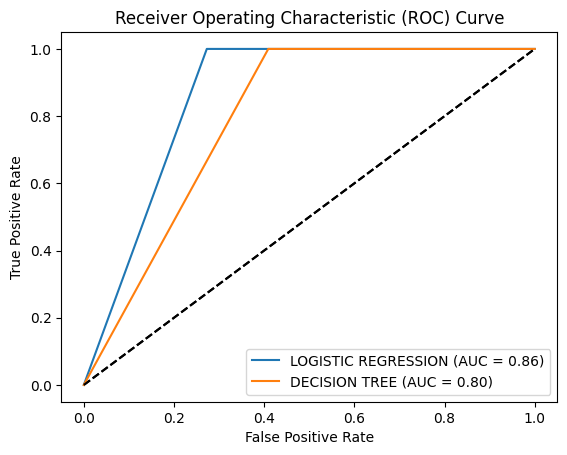

In [ ]:
print('-'*50)
print(f"Evaluation metrics when data is split in 80:20 train-test ratio.")
logistic_results_1 = Evaluation(y_val_20, y_pred_lr1, y_prob_lr1, 'LOGISTIC REGRESSION')
decision_tree_results1 = Evaluation(y_val_20, y_pred_dt1, y_prob_dt1, 'DECISION TREE')
print('-'*50)
print('-'*50)

--------------------------------------------------
Evaluation metrics when data is split in 70:30 train-test ratio.
LOGISTIC REGRESSION EVALUATION:
CONFUSION MATRIX:
 [[22 10]
 [ 0  3]]
ACCURACY: 0.7142857142857143
PRECISION: 0.23076923076923078
RECALL: 1.0
F1-SCORE: 0.375
ROC_AUC_SCORE: 0.84375
----------------------------------------------------------------------------------------------------
DECISION TREE EVALUATION:
CONFUSION MATRIX:
 [[18 14]
 [ 1  2]]
ACCURACY: 0.5714285714285714
PRECISION: 0.125
RECALL: 0.6666666666666666
F1-SCORE: 0.21052631578947367
ROC_AUC_SCORE: 0.6145833333333333
----------------------------------------------------------------------------------------------------
--------------------------------------------------
--------------------------------------------------


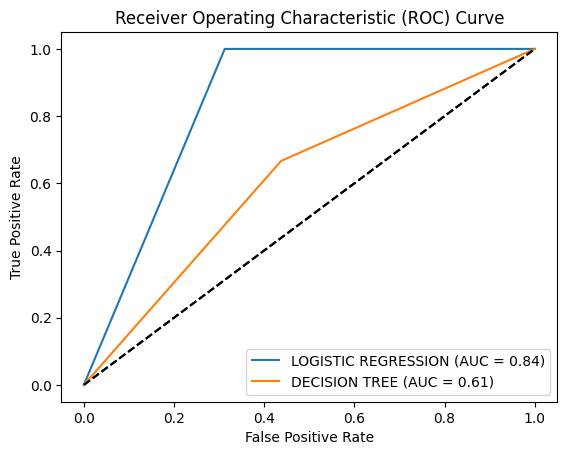

In [ ]:
print('-'*50)
print(f"Evaluation metrics when data is split in 70:30 train-test ratio.")
logistic_results_2 = Evaluation(y_val_30, y_pred_lr2, y_prob_lr2, 'LOGISTIC REGRESSION')
decision_tree_results2 = Evaluation(y_val_30, y_pred_dt2, y_prob_dt2, 'DECISION TREE')
print('-'*50)
print('-'*50)

--------------------------------------------------
Evaluation metrics when data is split in 60:40 train-test ratio.
LOGISTIC REGRESSION EVALUATION:
CONFUSION MATRIX:
 [[33 10]
 [ 1  3]]
ACCURACY: 0.7659574468085106
PRECISION: 0.23076923076923078
RECALL: 0.75
F1-SCORE: 0.35294117647058826
ROC_AUC_SCORE: 0.7587209302325583
----------------------------------------------------------------------------------------------------
DECISION TREE EVALUATION:
CONFUSION MATRIX:
 [[24 19]
 [ 0  4]]
ACCURACY: 0.5957446808510638
PRECISION: 0.17391304347826086
RECALL: 1.0
F1-SCORE: 0.2962962962962963
ROC_AUC_SCORE: 0.7790697674418605
----------------------------------------------------------------------------------------------------
--------------------------------------------------
--------------------------------------------------


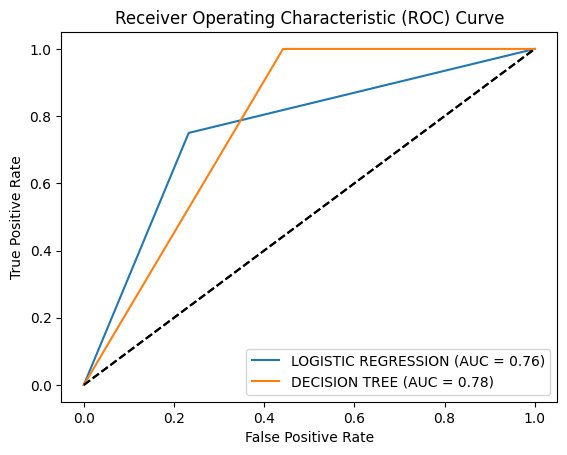

In [ ]:
print('-'*50)
print(f"Evaluation metrics when data is split in 60:40 train-test ratio.")
logistic_results_3 = Evaluation(y_val_40, y_pred_lr3, y_prob_lr3, 'LOGISTIC REGRESSION')
decision_tree_results3 = Evaluation(y_val_40, y_pred_dt3, y_prob_dt3, 'DECISION TREE')
print('-'*50)
print('-'*50)

In [ ]:
#conf_mat, accuracy, precision, recall, f1_scr, roc_auc_scr
df_lr = pd.DataFrame({
    'Train-test split': ['80:20', '70:30', '60:40'],
    'conf_mat':[logistic_results_1[0], logistic_results_2[0], logistic_results_3[0]],
    'accuracy':[logistic_results_1[1], logistic_results_2[1], logistic_results_3[1]],
    'precision': [logistic_results_1[2], logistic_results_2[2], logistic_results_3[2]],
    'recall': [logistic_results_1[3], logistic_results_2[3], logistic_results_3[3]],
    'f1_score': [logistic_results_1[4], logistic_results_2[4], logistic_results_3[4]],
    'roc_auc_score': [logistic_results_1[5], logistic_results_2[5], logistic_results_3[5]]
})

df_lr

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score
0,80:20,"[[16, 6], [0, 2]]",0.750000,0.250000,1.00,0.400000,0.863636
1,70:30,"[[22, 10], [0, 3]]",0.714286,0.230769,1.00,0.375000,0.843750
2,60:40,"[[33, 10], [1, 3]]",0.765957,0.230769,0.75,0.352941,0.758721


In [ ]:
df_dt =pd.DataFrame( {
    'Train-test split': ['80:20', '70:30', '60:40'],
    'conf_mat':[decision_tree_results1[0], decision_tree_results2[0], decision_tree_results3[0]],
    'accuracy':[decision_tree_results1[1], decision_tree_results2[1], decision_tree_results3[1]],
    'precision': [decision_tree_results1[2], decision_tree_results2[2], decision_tree_results3[2]],
    'recall': [decision_tree_results1[3], decision_tree_results2[3], decision_tree_results3[3]],
    'f1_score': [decision_tree_results1[4], decision_tree_results2[4], decision_tree_results3[4]],
    'roc_auc_score': [decision_tree_results1[5], decision_tree_results2[5], decision_tree_results3[5]]
})

df_dt

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score
0,80:20,"[[13, 9], [0, 2]]",0.625000,0.181818,1.000000,0.307692,0.795455
1,70:30,"[[18, 14], [1, 2]]",0.571429,0.125000,0.666667,0.210526,0.614583
2,60:40,"[[24, 19], [0, 4]]",0.595745,0.173913,1.000000,0.296296,0.779070


In [ ]:
print(df_lr)
print()
print(df_dt)

  Train-test split            conf_mat  accuracy  precision  recall  f1_score  \
0            80:20   [[16, 6], [0, 2]]  0.750000   0.250000    1.00  0.400000   
1            70:30  [[22, 10], [0, 3]]  0.714286   0.230769    1.00  0.375000   
2            60:40  [[33, 10], [1, 3]]  0.765957   0.230769    0.75  0.352941   

   roc_auc_score  
0       0.863636  
1       0.843750  
2       0.758721  

  Train-test split            conf_mat  accuracy  precision    recall  \
0            80:20   [[13, 9], [0, 2]]  0.625000   0.181818  1.000000   
1            70:30  [[18, 14], [1, 2]]  0.571429   0.125000  0.666667   
2            60:40  [[24, 19], [0, 4]]  0.595745   0.173913  1.000000   

   f1_score  roc_auc_score  
0  0.307692       0.795455  
1  0.210526       0.614583  
2  0.296296       0.779070  


INTERPRETING THE RESULTS AND CHOOSING THE BEST MODEL:
1. **LOGISTIC REGRESSION:**
  1. **High Recall, Low Precision:** The model consistently achieves perfect recall across all splits, indicating it correctly identifies all actual positive cases (bugs). However, this comes at the cost of low precision (0.15-0.25), which means a large number of predicted positive cases are actually negatives (FALSE POSITIVES).
  
  2. **Decreasing Performance with Smaller Training Set:** As the training set decreases (from 80:20 to 60:40 split), the accuracy, precision, f1_score, roc_auc_score also decrease. This suggests model might be overfitting to the smaller training sets and not generalizing well.
  
  3. **Trade-off between Precision and Recall:** The results highlight a trade-off between precision and recall. The model is optimized to capture all positive cases (high recall), but this leads to a higher rate of false positives (low precision).
  
  4. **Moderate Overall Performance:** Despite the perfect recall, the low precision and decreasing performance with smaller training sets suggest the model might not be very reliable for practical use. The moderate ROC AUC scores (0.73 - 0.86) indicate some ability to distinguish between positive and negative cases, but there's room for improvement.

2. ** DECISION TREE: **
  1. **Inconsistent Performance:** The Decision Tree model shows more variability in its performance across different splits compared to Logistic Regression. Recall, precision, and F1-score fluctuate significantly.

  2. **Lower Precision and Recall:** While the precision is slightly higher than Logistic Regression in the 80:20 split, it drops considerably in the other splits. The recall is also lower and less consistent than Logistic Regression.
  
  3. **Potential Overfitting:** The inconsistent performance and decreasing metrics with smaller training sets suggest overfitting. The model might be learning noise in the training data, leading to poor generalization.
  
  4. **Lower Overall Performance:** The lower and more variable metrics, including accuracy, F1-score, and ROC AUC score, indicate that the Decision Tree model is performing worse than Logistic Regression on this dataset.


**COMPARING THE MODELS**
1. Logistic Regression-- more stable with perfect recall, but suffers from low precision, suggesting it might be better for scenarios where missing positive cases (bugs) is highly undesirable, even at the cost of more false positives.
2. Decision Tree-- More variable performance, lower precision and recall in most cases, with potential overfitting.

Out of the two, Logistic Regression seems a better choice because it varies less compared to Decision Tree.  


# ASSIGNMENT - 2

## MODEL TRAINING

### Ensemble method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def perform_rf(X_train_pca, y_train, X_val_pca):

  param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'class_weight':['balanced', 'balanced_subsample']
}

  random_forest_gs = GridSearchCV(RandomForestClassifier(random_state=42),
                             param_grid, cv=3, scoring='f1_weighted')

  random_forest_gs.fit(X_train_pca, y_train)

  best_rf_model = random_forest_gs.best_estimator_
  best_rf_params = random_forest_gs.best_params_

  print("\nBest Random Forest Hyperparameters:", best_rf_params)

  y_pred_rf_model = random_forest_gs.predict(X_val_pca)
  y_probs_rf_model = random_forest_gs.predict_proba(X_val_pca)[:, 1]

  return y_pred_rf_model, y_probs_rf_model

print('-'*50)
print(f"\nRandom Forest when train test split is 80:20")
y_pred_rf1, y_prob_rf1 = perform_rf(X_train_pca_80, y_train_80, X_val_pca_20)
print('-'*50)
print('-'*50)
print(f"\nRandom Forest when train test split is 70:30")
y_pred_rf2, y_prob_rf2 = perform_rf(X_train_pca_70, y_train_70, X_val_pca_30)
print('-'*50)
print('-'*50)
print(f"\nRandom Forest when train test split is 60:40")
y_pred_rf3, y_prob_rf3 = perform_rf(X_train_pca_60, y_train_60, X_val_pca_40)



--------------------------------------------------

Random Forest when train test split is 80:20

Best Random Forest Hyperparameters: {'class_weight': 'balanced_subsample', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
--------------------------------------------------
--------------------------------------------------

Random Forest when train test split is 70:30

Best Random Forest Hyperparameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
--------------------------------------------------
--------------------------------------------------

Random Forest when train test split is 60:40

Best Random Forest Hyperparameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200}


## K-Nearest Neighbour

In [ ]:
def perform_knn(X_train_pca, y_train, X_val_pca):

  param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
  }

  knn_gs = GridSearchCV(KNeighborsClassifier(),param_grid, cv=3, scoring='f1_weighted')


  knn_gs.fit(X_train_pca, y_train)

  best_knn_model = knn_gs.best_estimator_
  best_knn_params = knn_gs.best_params_

  print("\nBest K-Nearest Neighbours Hyperparameters:", best_knn_params)

  y_pred_knn_model = knn_gs.predict(X_val_pca)
  y_probs_knn_model = knn_gs.predict_proba(X_val_pca)[:, 1]

  return y_pred_knn_model, y_probs_knn_model

print('-'*50)
print(f"\nK-Nearest Neighbours when train test split is 80:20")
y_pred_knn1, y_prob_knn1 = perform_knn(X_train_pca_80, y_train_80, X_val_pca_20)
print('-'*50)
print('-'*50)
print(f"\nK-Nearest Neighbours when train test split is 70:30")
y_pred_knn2, y_prob_knn2 = perform_knn(X_train_pca_70, y_train_70, X_val_pca_30)
print('-'*50)
print('-'*50)
print(f"\nK-Nearest Neighbours when train test split is 60:40")
y_pred_knn3, y_prob_knn3 = perform_knn(X_train_pca_60, y_train_60, X_val_pca_40)



--------------------------------------------------

K-Nearest Neighbours when train test split is 80:20

Best K-Nearest Neighbours Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
--------------------------------------------------
--------------------------------------------------

K-Nearest Neighbours when train test split is 70:30

Best K-Nearest Neighbours Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
--------------------------------------------------
--------------------------------------------------

K-Nearest Neighbours when train test split is 60:40

Best K-Nearest Neighbours Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


--------------------------------------------------
Evaluation metrics when data is split in 80:20 train-test ratio.
LOGISTIC REGRESSION EVALUATION:
CONFUSION MATRIX:
 [[16  6]
 [ 0  2]]
ACCURACY: 0.75
PRECISION: 0.25
RECALL: 1.0
F1-SCORE: 0.4
ROC_AUC_SCORE: 0.8636363636363636
----------------------------------------------------------------------------------------------------
DECISION TREE EVALUATION:
CONFUSION MATRIX:
 [[13  9]
 [ 0  2]]
ACCURACY: 0.625
PRECISION: 0.18181818181818182
RECALL: 1.0
F1-SCORE: 0.3076923076923077
ROC_AUC_SCORE: 0.7954545454545454
----------------------------------------------------------------------------------------------------
RANDOM FOREST EVALUATION:
CONFUSION MATRIX:
 [[14  8]
 [ 1  1]]
ACCURACY: 0.625
PRECISION: 0.1111111111111111
RECALL: 0.5
F1-SCORE: 0.18181818181818182
ROC_AUC_SCORE: 0.5681818181818182
----------------------------------------------------------------------------------------------------
KNN EVALUATION:
CONFUSION MATRIX:
 [[17  5]
 [ 0

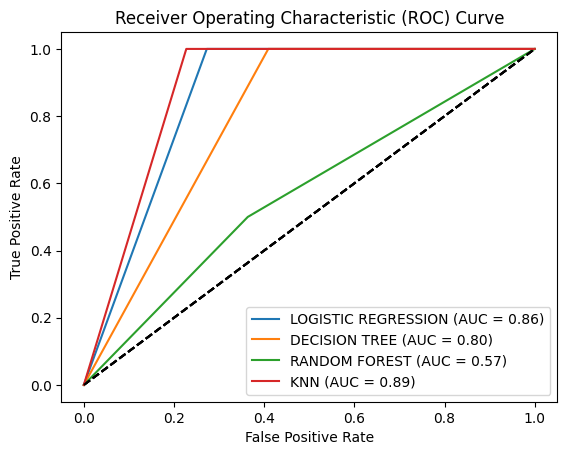

In [ ]:
print('-'*50)
print(f"Evaluation metrics when data is split in 80:20 train-test ratio.")
logistic_results_1 = Evaluation(y_val_20, y_pred_lr1, y_prob_lr1, 'LOGISTIC REGRESSION')
decision_tree_results1 = Evaluation(y_val_20, y_pred_dt1, y_prob_dt1, 'DECISION TREE')
random_forest1 = Evaluation(y_val_20, y_pred_rf1, y_prob_rf1, 'RANDOM FOREST')
knn1 = Evaluation(y_val_20, y_pred_knn1, y_pred_knn1, 'KNN')
print('-'*50)
print('-'*50)

--------------------------------------------------
Evaluation metrics when data is split in 70:30 train-test ratio.
LOGISTIC REGRESSION EVALUATION:
CONFUSION MATRIX:
 [[22 10]
 [ 0  3]]
ACCURACY: 0.7142857142857143
PRECISION: 0.23076923076923078
RECALL: 1.0
F1-SCORE: 0.375
ROC_AUC_SCORE: 0.84375
----------------------------------------------------------------------------------------------------
DECISION TREE EVALUATION:
CONFUSION MATRIX:
 [[18 14]
 [ 1  2]]
ACCURACY: 0.5714285714285714
PRECISION: 0.125
RECALL: 0.6666666666666666
F1-SCORE: 0.21052631578947367
ROC_AUC_SCORE: 0.6145833333333333
----------------------------------------------------------------------------------------------------
RANDOM FOREST EVALUATION:
CONFUSION MATRIX:
 [[24  8]
 [ 0  3]]
ACCURACY: 0.7714285714285715
PRECISION: 0.2727272727272727
RECALL: 1.0
F1-SCORE: 0.42857142857142855
ROC_AUC_SCORE: 0.875
----------------------------------------------------------------------------------------------------
KNN EVALUATIO

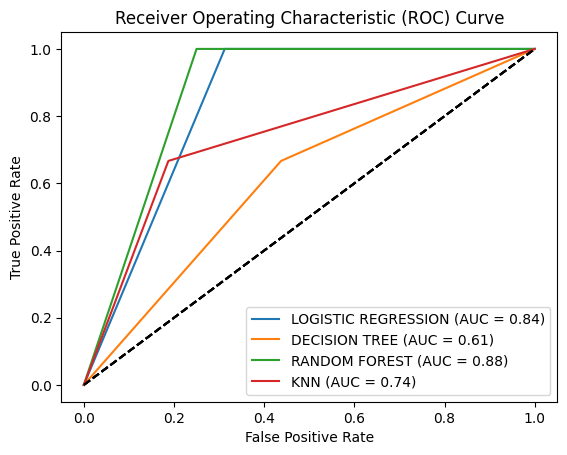

In [ ]:
print('-'*50)
print(f"Evaluation metrics when data is split in 70:30 train-test ratio.")
logistic_results_2 = Evaluation(y_val_30, y_pred_lr2, y_prob_lr2, 'LOGISTIC REGRESSION')
decision_tree_results2 = Evaluation(y_val_30, y_pred_dt2, y_prob_dt2, 'DECISION TREE')
random_forest2= Evaluation(y_val_30, y_pred_rf2, y_prob_rf2, 'RANDOM FOREST')
knn2 = Evaluation(y_val_30, y_pred_knn2, y_pred_knn2, 'KNN')
print('-'*50)
print('-'*50)

--------------------------------------------------
Evaluation metrics when data is split in 60:40 train-test ratio.
LOGISTIC REGRESSION EVALUATION:
CONFUSION MATRIX:
 [[33 10]
 [ 1  3]]
ACCURACY: 0.7659574468085106
PRECISION: 0.23076923076923078
RECALL: 0.75
F1-SCORE: 0.35294117647058826
ROC_AUC_SCORE: 0.7587209302325583
----------------------------------------------------------------------------------------------------
DECISION TREE EVALUATION:
CONFUSION MATRIX:
 [[24 19]
 [ 0  4]]
ACCURACY: 0.5957446808510638
PRECISION: 0.17391304347826086
RECALL: 1.0
F1-SCORE: 0.2962962962962963
ROC_AUC_SCORE: 0.7790697674418605
----------------------------------------------------------------------------------------------------
RANDOM FOREST EVALUATION:
CONFUSION MATRIX:
 [[27 16]
 [ 1  3]]
ACCURACY: 0.6382978723404256
PRECISION: 0.15789473684210525
RECALL: 0.75
F1-SCORE: 0.2608695652173913
ROC_AUC_SCORE: 0.688953488372093
-----------------------------------------------------------------------------

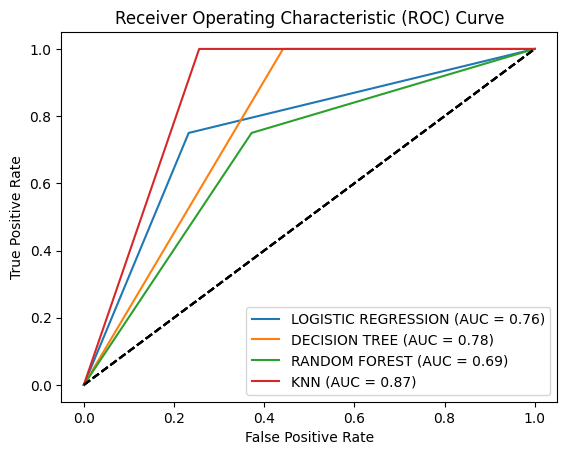

In [ ]:
print('-'*50)
print(f"Evaluation metrics when data is split in 60:40 train-test ratio.")
logistic_results_3 = Evaluation(y_val_40, y_pred_lr3, y_prob_lr3, 'LOGISTIC REGRESSION')
decision_tree_results3 = Evaluation(y_val_40, y_pred_dt3, y_prob_dt3, 'DECISION TREE')
random_forest3 = Evaluation(y_val_40, y_pred_rf3, y_prob_rf3, 'RANDOM FOREST')
knn3 = Evaluation(y_val_40, y_pred_knn3, y_pred_knn3, 'KNN')
print('-'*50)
print('-'*50)

In [ ]:
df_rf = pd.DataFrame({
    'Train-test split': ['80:20', '70:30', '60:40'],
    'conf_mat':[random_forest1[0], random_forest2[0], random_forest3[0]],
    'accuracy':[random_forest1[1], random_forest2[1], random_forest3[1]],
    'precision': [random_forest1[2], random_forest2[2], random_forest3[2]],
    'recall': [random_forest1[3], random_forest2[3], random_forest3[3]],
    'f1_score': [random_forest1[4], random_forest2[4], random_forest3[4]],
    'roc_auc_score': [random_forest1[5], random_forest2[5], random_forest3[5]]
}
)
df_rf

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score
0,80:20,"[[14, 8], [1, 1]]",0.625000,0.111111,0.50,0.181818,0.568182
1,70:30,"[[24, 8], [0, 3]]",0.771429,0.272727,1.00,0.428571,0.875000
2,60:40,"[[27, 16], [1, 3]]",0.638298,0.157895,0.75,0.260870,0.688953


In [ ]:
df_knn = pd.DataFrame({
    'Train-test split': ['80:20', '70:30', '60:40'],
    'conf_mat':[knn1[0], knn2[0], knn3[0]],
    'accuracy':[knn1[1], knn2[1], knn3[1]],
    'precision': [knn1[2], knn2[2], knn3[2]],
    'recall': [knn1[3], knn2[3], knn3[3]],
    'f1_score': [knn1[4], knn2[4], knn3[4]],
    'roc_auc_score': [knn1[5], knn2[5], knn3[5]]
}
)
df_knn

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score
0,80:20,"[[17, 5], [0, 2]]",0.791667,0.285714,1.000000,0.444444,0.886364
1,70:30,"[[26, 6], [1, 2]]",0.800000,0.250000,0.666667,0.363636,0.739583
2,60:40,"[[32, 11], [0, 4]]",0.765957,0.266667,1.000000,0.421053,0.872093


### Compare the performances of each model/classifier considering the given dataset using different evaluation measures such as Precision, Recall, F1-Score, AUC-ROC. Show the comparison chart in Python notebook.

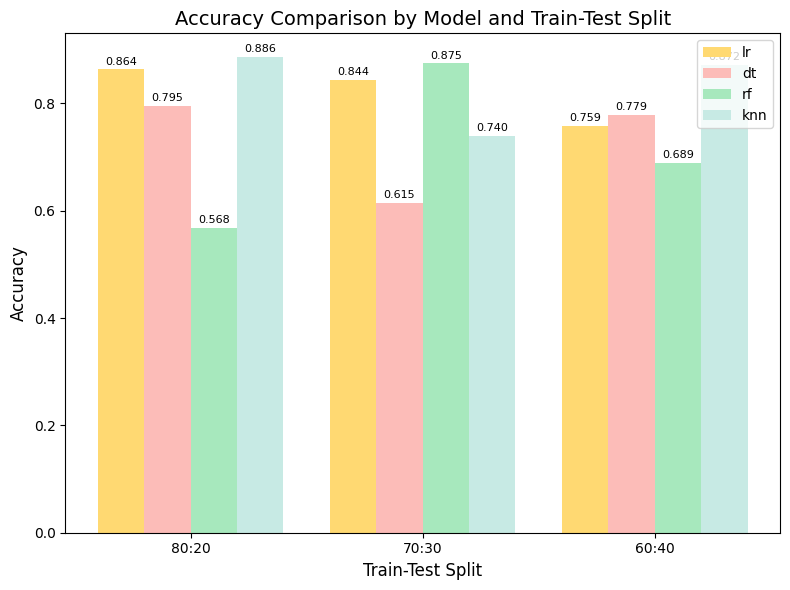

In [ ]:
# COMPARISON CHART FOR ROC_AUC_SCORE
splits = ['80:20','70:30','60:40']

colors = ['#FFD972', '#FCBCB8', '#A7E8BD', '#C7EAE4']
val=5
model_roc_auc_scores = {
   'lr': [logistic_results_1[val],logistic_results_2[val], logistic_results_3[val]],
   'dt':[decision_tree_results1[val], decision_tree_results2[val], decision_tree_results3[val]],
   'rf':[random_forest1[val], random_forest2[val], random_forest3[val]],
   'knn':[knn1[val], knn2[val], knn3[val]]
}
models = list(model_roc_auc_scores.keys())
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.2
index = np.arange(len(splits))
bar_width = 0.2
for i, model in enumerate(models):
    values = model_roc_auc_scores[model]
    position = index + i * bar_width
    ax.bar(position, values, bar_width, label=model, color = colors[i])
    for j, val in enumerate(values):
        ax.text(position[j], val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=8)  # Add value labels

ax.set_xlabel('Train-Test Split', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison by Model and Train-Test Split', fontsize=14)
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(splits)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()




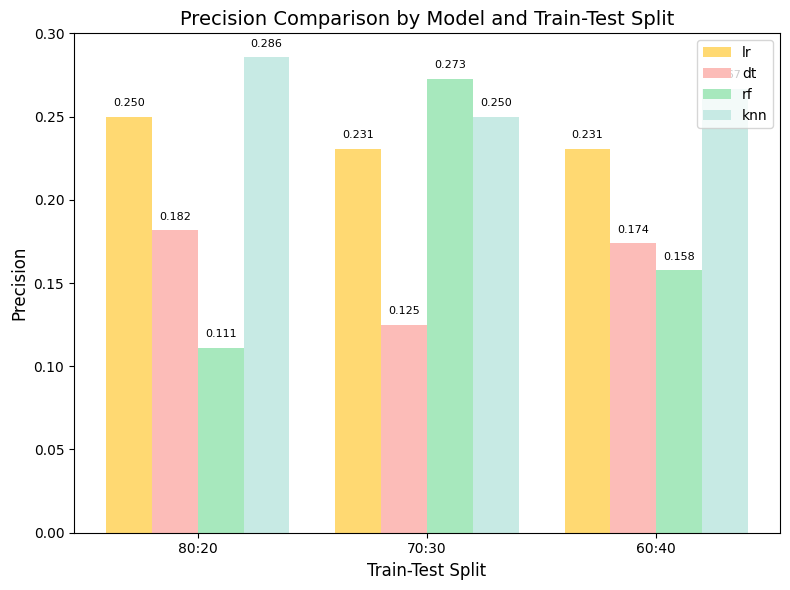

In [ ]:
# COMPARISON CHART FOR PRECISION
splits = ['80:20','70:30','60:40']

colors = ['#FFD972', '#FCBCB8', '#A7E8BD', '#C7EAE4']
val=2
model_prec_scores = {
   'lr': [logistic_results_1[val],logistic_results_2[val], logistic_results_3[val]],
   'dt':[decision_tree_results1[val], decision_tree_results2[val], decision_tree_results3[val]],
   'rf':[random_forest1[val], random_forest2[val], random_forest3[val]],
   'knn':[knn1[val], knn2[val], knn3[val]]
}
models = list(model_prec_scores.keys())
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.2
index = np.arange(len(splits))
bar_width = 0.2
for i, model in enumerate(models):
    values = model_prec_scores[model]
    position = index + i * bar_width
    ax.bar(position, values, bar_width, label=model, color = colors[i])
    for j, val in enumerate(values):
        ax.text(position[j], val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=8)  # Add value labels

ax.set_xlabel('Train-Test Split', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Precision Comparison by Model and Train-Test Split', fontsize=14)
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(splits)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()




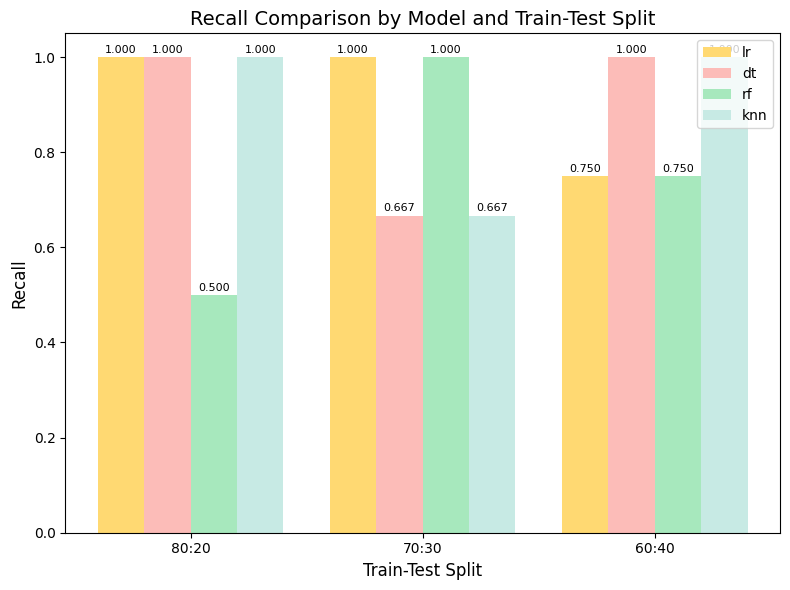

In [ ]:
# COMPARISON CHART FOR RECALL
splits = ['80:20','70:30','60:40']

colors = ['#FFD972', '#FCBCB8', '#A7E8BD', '#C7EAE4']
val=3
model_recall_scores = {
   'lr': [logistic_results_1[val],logistic_results_2[val], logistic_results_3[val]],
   'dt':[decision_tree_results1[val], decision_tree_results2[val], decision_tree_results3[val]],
   'rf':[random_forest1[val], random_forest2[val], random_forest3[val]],
   'knn':[knn1[val], knn2[val], knn3[val]]
}
models = list(model_recall_scores.keys())
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.2
index = np.arange(len(splits))
bar_width = 0.2
for i, model in enumerate(models):
    values = model_recall_scores[model]
    position = index + i * bar_width
    ax.bar(position, values, bar_width, label=model, color = colors[i])
    for j, val in enumerate(values):
        ax.text(position[j], val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=8)  # Add value labels

ax.set_xlabel('Train-Test Split', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)
ax.set_title('Recall Comparison by Model and Train-Test Split', fontsize=14)
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(splits)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()




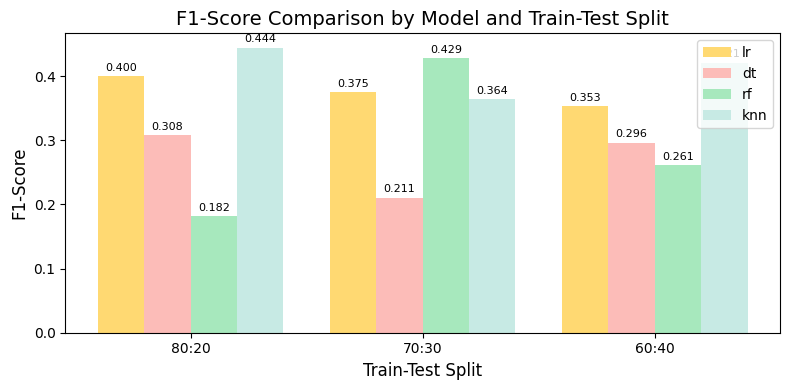

In [ ]:
# COMPARISON CHART FOR F1-SCORE
splits = ['80:20','70:30','60:40']

colors = ['#FFD972', '#FCBCB8', '#A7E8BD', '#C7EAE4']
val=4
model_f1_scores = {
   'lr': [logistic_results_1[val],logistic_results_2[val], logistic_results_3[val]],
   'dt':[decision_tree_results1[val], decision_tree_results2[val], decision_tree_results3[val]],
   'rf':[random_forest1[val], random_forest2[val], random_forest3[val]],
   'knn':[knn1[val], knn2[val], knn3[val]]
}
models = list(model_f1_scores.keys())
fig, ax = plt.subplots(figsize=(8,4))
bar_width = 0.2
index = np.arange(len(splits))
bar_width = 0.2
for i, model in enumerate(models):
    values = model_f1_scores[model]
    position = index + i * bar_width
    ax.bar(position, values, bar_width, label=model, color = colors[i])
    for j, val in enumerate(values):
        ax.text(position[j], val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=8)  # Add value labels

ax.set_xlabel('Train-Test Split', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('F1-Score Comparison by Model and Train-Test Split', fontsize=14)
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(splits)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()




## Comparing models to choose the best model

In [ ]:
df_dt['Model_name'] = ['Decision Tree','Decision Tree','Decision Tree' ]
df_rf['Model_name'] = ['Random Forest', 'Random Forest', 'Random Forest']
df_lr['Model_name'] = ['Logistic Regression','Logistic Regression', 'Logistic Regression']
df_knn['Model_name'] = ['KNearest Neighbour', 'KNearest Neighbour', 'KNearest Neighbour']

In [ ]:
df_dt

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score,Model_name
0,80:20,"[[13, 9], [0, 2]]",0.625000,0.181818,1.000000,0.307692,0.795455,Decision Tree
1,70:30,"[[18, 14], [1, 2]]",0.571429,0.125000,0.666667,0.210526,0.614583,Decision Tree
2,60:40,"[[24, 19], [0, 4]]",0.595745,0.173913,1.000000,0.296296,0.779070,Decision Tree


In [ ]:
combined_models = pd.concat([df_lr, df_dt, df_rf, df_knn], ignore_index=True)

In [ ]:
combined_models

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score,Model_name
0,80:20,"[[16, 6], [0, 2]]",0.750000,0.250000,1.000000,0.400000,0.863636,Logistic Regression
1,70:30,"[[22, 10], [0, 3]]",0.714286,0.230769,1.000000,0.375000,0.843750,Logistic Regression
2,60:40,"[[33, 10], [1, 3]]",0.765957,0.230769,0.750000,0.352941,0.758721,Logistic Regression
3,80:20,"[[13, 9], [0, 2]]",0.625000,0.181818,1.000000,0.307692,0.795455,Decision Tree
4,70:30,"[[18, 14], [1, 2]]",0.571429,0.125000,0.666667,0.210526,0.614583,Decision Tree
5,60:40,"[[24, 19], [0, 4]]",0.595745,0.173913,1.000000,0.296296,0.779070,Decision Tree
6,80:20,"[[14, 8], [1, 1]]",0.625000,0.111111,0.500000,0.181818,0.568182,Random Forest
7,70:30,"[[24, 8], [0, 3]]",0.771429,0.272727,1.000000,0.428571,0.875000,Random Forest
8,60:40,"[[27, 16], [1, 3]]",0.638298,0.157895,0.750000,0.260870,0.688953,Random Forest
9,80:20,"[[17, 5], [0, 2]]",0.791667,0.285714,1.000000,0.444444,0.886364,KNearest Neighbour


In [ ]:
# sort based on f1 score
combined_models.sort_values(by='f1_score', ascending=False)

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score,Model_name
9,80:20,"[[17, 5], [0, 2]]",0.791667,0.285714,1.000000,0.444444,0.886364,KNearest Neighbour
7,70:30,"[[24, 8], [0, 3]]",0.771429,0.272727,1.000000,0.428571,0.875000,Random Forest
11,60:40,"[[32, 11], [0, 4]]",0.765957,0.266667,1.000000,0.421053,0.872093,KNearest Neighbour
0,80:20,"[[16, 6], [0, 2]]",0.750000,0.250000,1.000000,0.400000,0.863636,Logistic Regression
1,70:30,"[[22, 10], [0, 3]]",0.714286,0.230769,1.000000,0.375000,0.843750,Logistic Regression
10,70:30,"[[26, 6], [1, 2]]",0.800000,0.250000,0.666667,0.363636,0.739583,KNearest Neighbour
2,60:40,"[[33, 10], [1, 3]]",0.765957,0.230769,0.750000,0.352941,0.758721,Logistic Regression
3,80:20,"[[13, 9], [0, 2]]",0.625000,0.181818,1.000000,0.307692,0.795455,Decision Tree
5,60:40,"[[24, 19], [0, 4]]",0.595745,0.173913,1.000000,0.296296,0.779070,Decision Tree
8,60:40,"[[27, 16], [1, 3]]",0.638298,0.157895,0.750000,0.260870,0.688953,Random Forest


In [ ]:
# sort based on roc auc score
combined_models.sort_values(by='roc_auc_score', ascending=False)

,Train-test split,conf_mat,accuracy,precision,recall,f1_score,roc_auc_score,Model_name
9,80:20,"[[17, 5], [0, 2]]",0.791667,0.285714,1.000000,0.444444,0.886364,KNearest Neighbour
7,70:30,"[[24, 8], [0, 3]]",0.771429,0.272727,1.000000,0.428571,0.875000,Random Forest
11,60:40,"[[32, 11], [0, 4]]",0.765957,0.266667,1.000000,0.421053,0.872093,KNearest Neighbour
0,80:20,"[[16, 6], [0, 2]]",0.750000,0.250000,1.000000,0.400000,0.863636,Logistic Regression
1,70:30,"[[22, 10], [0, 3]]",0.714286,0.230769,1.000000,0.375000,0.843750,Logistic Regression
3,80:20,"[[13, 9], [0, 2]]",0.625000,0.181818,1.000000,0.307692,0.795455,Decision Tree
5,60:40,"[[24, 19], [0, 4]]",0.595745,0.173913,1.000000,0.296296,0.779070,Decision Tree
2,60:40,"[[33, 10], [1, 3]]",0.765957,0.230769,0.750000,0.352941,0.758721,Logistic Regression
10,70:30,"[[26, 6], [1, 2]]",0.800000,0.250000,0.666667,0.363636,0.739583,KNearest Neighbour
8,60:40,"[[27, 16], [1, 3]]",0.638298,0.157895,0.750000,0.260870,0.688953,Random Forest


**COMMON PATTERN:**

**HIGH RECALL, LOW PRECISION:** A common pattern among the models that can be observed is that all of them have a very high recall value which means they correctly identify all positive instances. However, they have very low precision value which means that there is high number of false positives. This suggests significant class imbalance issue.

**BEST OVERALL PERFORMANCE:**

The **K-Nearest Neighbour (KNN) model with a 80:20 train-test split** performs the best among all the models trained and tested. It has the highest F1-score of 0.4444 and the highest ROC_AUC score (0.886364). This indicates a better balance between precision and recall, and a stronger ability to distinguish between classes.
The second best being the KNN model with 60:40 train-test split.

<br>

**ISSUES WITH OTHER MODELS:**

1. **Logistic Regression:** Logistic Regression models consistently have very low precision, resulting in low F1-scores, even though they achieve perfect recall.
2. **Random Forest Performance:** The random forest models preform better than the logistic regression models, but not as well as the KNN models.
3. **Decision Tree Performance:** The decision tree model has the lowest overall scores.

In [ ]:
!